## Basic API for OpenCV chapter1~7

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image,ImageFont, ImageDraw

### 1. 窗口操作

In [2]:
# construct a window
winname = 'window'
cv2.namedWindow(winname,cv2.WINDOW_NORMAL)
# resize the window
cv2.resizeWindow(winname,width=800,height=600)
# show the image on the window
cv2.imshow(winname,0)
# waite the user's key event => return key's ascii
key = cv2.waitKey(0) # 0 means to wait forever, waitKey(t) means to wait for t ms and then shut down the window if no key event
if key & 0xFF == ord('q'):
    cv2.destroyAllWindows()

### 2. 图片读写操作

(500, 800, 3)


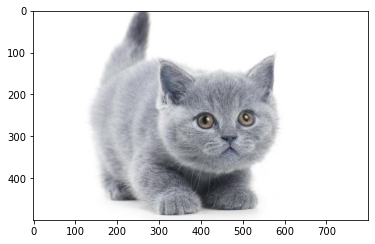

In [3]:
img = cv2.imread('../data/gray cat.jpeg') # opencv's channel order is BGR
print(img.shape)
img

# use plt to show img
plt.imshow(img) # plt's channel order is RGB

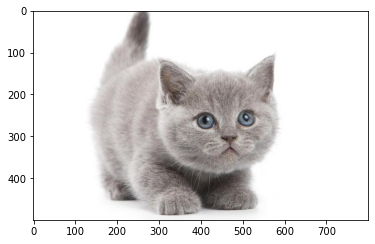

In [4]:
img_RGB = img[:,:,[2,1,0]] # BGR => RGB
plt.imshow(img_RGB)

In [5]:
# use cv2 to show image
cv2.imshow('gray cat',img)
key = cv2.waitKey(0)
if key == ord('q'):
    cv2.destroyAllWindows()

In [6]:
# create a convenient cv2 image show func
def cv2_imshow(name,img):
    import cv2
    cv2.imshow(name,img)
    key = ''
    while key is not ord('q'):
        key = cv2.waitKey(0)
    cv2.destroyWindow(name)

In [7]:
cv2_imshow('gray cat',img)

In [8]:
# save image
path = '../data/blue cat.jpeg'
cv2.imwrite(path,img_RGB)

True

### 3. 视频读写操作

In [15]:
# capture a video from camera(if the param is the camera idx) or from a file(if the param is the file path)
winname = 'video'
cv2.namedWindow(winname,cv2.WINDOW_NORMAL)
cv2.resizeWindow(winname,width=1280,height=720)

# camera = cv2.VideoCapture(idx) # from the idx camera
cap = cv2.VideoCapture('../data/kindergarden.mp4')
fps = 60

# video write media type
fourcc = cv2.VideoWriter_fourcc(*'mp4v') # *'mp4v' = 'm','p','4','v'
# video writer
save_path = '../data/kindergarden_fast.mp4'
vwriter = cv2.VideoWriter(save_path,fourcc,fps,(1280,720))

# play the video through imshow
while cap.isOpened():
    # read one frame from captured video
    flag,frame = cap.read() 
    if not flag:
        break
    # write a frame
    vwriter.write(frame)
    # show the frame in the window
    cv2.imshow(winname,frame)
    # wait key
    key = cv2.waitKey(1000 // fps) # control the show speed
    if key == ord('q'):
        break

# release the captured video resourse and video writer resource(so now it's going to write to save path)
cap.release()
vwriter.release()
cv2.destroyWindow(winname)

### 4. 鼠标操作

In [18]:
## mouse event callback func
userdata = cv2.EVENT_RBUTTONDOWN # mouse event: right button clicked down
def mouse_callback(event,x,y,flags,userdata):
    '''
    params:
        event: the enum of mouse events
        x,y: the corrdinate of mouse
        flags: combined keys as control or shift or alt,etc
        userdara: other params defined and inputed by user
    '''
    if event == userdata:
        print(event,x,y,flags)
        
winname = 'mouse'
cv2.namedWindow(winname,cv2.WINDOW_NORMAL)
cv2.resizeWindow(winname,width=800,height=600)
# set mouse event callback
cv2.setMouseCallback(winname,mouse_callback,userdata)

background = np.zeros((600,800),dtype=np.uint8)

while True:
    cv2.imshow(winname,background)
    key = cv2.waitKey(10)
    if key == ord('q'):
        break

cv2.destroyWindow(winname)

2 340 286 2
2 609 193 2
2 428 467 2
2 108 149 2
2 253 147 10
2 712 450 10
2 712 450 34


### 5. 颜色空间操作

In [2]:
## common color spaces
color_spaces = [
    cv2.COLOR_BGR2BGRA, # BGR => BGRA, A mesns alpha
    cv2.COLOR_BGR2RGB, # BGR => RGB
    cv2.COLOR_BGR2GRAY, # BGR => GRAY
    cv2.COLOR_BGR2HSV,  # BGR => HSV
    cv2.COLOR_BGR2YUV   # BGR => YUV
]

winname = 'color_space'
cv2.namedWindow(winname,cv2.WINDOW_NORMAL)
cv2.resizeWindow(winname,width=800,height=600)

# create a track bar to convert in color spaces
trackbar_name = 'color space track bar'
cv2.createTrackbar(trackbar_name,winname,0,len(color_spaces)-1,lambda v:v+1)
# read original BGR img
img_path = '../data/gray cat.jpeg'
img = cv2.imread(img_path)

while True:
    # get the value of the track bar
    idx = cv2.getTrackbarPos(trackbar_name,winname)
    # convert the image's color space
    cvt_img = cv2.cvtColor(img,color_spaces[idx])
    # show converted image
    cv2.imshow(winname,cvt_img)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
        
cv2.destroyWindow(winname)

In [ ]:
## split and merge color space
img = cv2.imread('../data/gray cat.jpeg')

# split BGR
b,g,r = cv2.split(img)

# merge RGB
img_RGB = cv2.merge((r,g,b))

cv2.imshow('img',img_RGB)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 6. 绘图操作

In [ ]:
# white board
img = np.full((600,400,3),fill_value=255,dtype=np.uint8)

## draw line: cv2.line(img,pt1,pt2,color,thickness,lineType)
pt1,pt2 = (10,20),(300,200)
line_color,thickness,lineType = (0,0,0),2,cv2.LINE_AA # black
cv2.line(img,pt1,pt2,line_color,thickness,lineType)

## draw rectangle: cv2.rectangle(img,pt1,pt2,color,thickness,lineType)
rectangle_color = (0,0,255) # red
cv2.rectangle(img,np.array(pt1)+50,np.array(pt2)-50,rectangle_color,thickness,lineType)

## draw circle: cv2.circle(img,center,radius,color,thickness,lineType)
circle_center,radius = (300,300),30
circle_color = (0,255,0) # green
cv2.circle(img,circle_center,radius,circle_color,thickness,lineType)

## draw ellipse: cv2.ellipse(img,center,axes,angle,startAngle,endAngle,color,thickness,lineType)
ellipse_center,axes = (100,300),(50,30) # (a,b)
angle,startAngle,endAngle = 120, 0, 360 # clock-wise angle
ellipse_color = (255,0,0) # blue
cv2.ellipse(img,ellipse_center,axes,angle,startAngle,endAngle,ellipse_color,thickness,lineType)


## draw polygonal: cv2.polylines(img,pts,isClosed,color,thickness,lineType)
## or filled one: cv2.fillPoly(img,pts,color,lineType)
pts = np.array([[(125,130),(147,160),(138,180)]],np.int32)
print(pts.shape) # pts.ndim should be 3
isClosed = True
poly_color,fillpoly_color = (255,255,0),(0,255,255) # cyne, yellow
cv2.polylines(img,pts,isClosed,poly_color,thickness,lineType)
cv2.fillPoly(img,pts,fillpoly_color,lineType)

cv2.imshow('draw',img)

cv2.waitKey(5000)
cv2.destroyAllWindows()

In [ ]:
## draw English text box
cv2.putText(img,'Hello OpenCV',(50,200),cv2.FONT_HERSHEY_COMPLEX,2,(0,0,255)) # (50,200) is the bottom-left of the text box

cv2,imshow('text',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
## draw Chinese text box
# font
font_path = './msyhbd.ttc'
font = ImageFont.truetype(font_path,size=10)
# pillow image
img = np.full((200,200,3),fill_value=255,dtype=np.uint8)
img_pil = Image.fromarray(img)
# pillow draw object
draw = ImageDraw.Draw(img_pil)
draw.text((30,100),'你好 世界',font=font,fill=(0,255,0,0)) # (30,100) is the bottom-left of the text box

# after draw, back to cv2 image
img = np.array(img_pil)
cv2.imshow('Chinese text',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 7. 几何操作

In [16]:
## add by numbers, if over 255, mod 256
dog = cv2.imread('../data/skinny dog.jpeg')
dog += 100

cv2.imshow('dog',dog)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
## add two images
cat = cv2.imread('../data/dark cat.jpeg')
dog = cv2.imread('../data/skinny dog.jpeg')

print(cat.shape)
print(dog.shape)

# the shape must match
dog = dog[:cat.shape[0],:cat.shape[1]]

# element-wise add, if over 255, truncate to 255
add_img = cv2.add(cat,dog)
cv2.imshow('add_img',add_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(720, 1080, 3)
(841, 1280, 3)


In [15]:
## subtract one image from another

# element-wise subtract, if under 0, truncate to 0
subtract_img = cv2.subtract(dog,cat)
cv2.imshow('subtract',subtract_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
## weighted add two images
cat = cv2.imread('../data/dark cat.jpeg')
dog = cv2.imread('../data/skinny dog.jpeg')
dog = dog[:cat.shape[0],:cat.shape[1]]

## wadd_img = cat * 0.7 + dog * 0.3 + 20
wadd_img = cv2.addWeighted(cat,0.7,dog,0.3,20)
cv2.imshow('wadd_img',wadd_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
## bitwise not/and/or
cat = cv2.imread('../data/gray cat.jpeg')
not_cat = cv2.bitwise_not(cat)

cv2.imshow('not',np.hstack([cat,not_cat]))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
## resize, using bi-linear interpolation by default
cat = cv2.imread('../data/dark cat.jpeg')
dog = cv2.imread('../data/skinny dog.jpeg')

print(cat.shape)
print(dog.shape)

# dsize = (width,height), so remember to reverse shape!!
small_dog = cv2.resize(dog,dsize=cat.shape[:2][::-1])
print(small_dog.shape)
cv2.imshow('resize',np.hstack([small_dog,cat]))
cv2.waitKey(0)
cv2.destroyAllWindows()

(720, 1080, 3)
(841, 1280, 3)
(720, 1080, 3)


In [25]:
## resize2 / scale
dog = cv2.imread('../data/skinny dog.jpeg')
# M = \fx 0  0 \ => non-homogeneous, so last row omits
#     \ 0 fy 0 \
#     \ 0 0  1 \ -> omitted M.shape = (2,3)
# [x',y',1] = M * [x,y,1]
half_dog = cv2.resize(dog,dsize=None,fx=0.5,fy=0.5)

print(dog.shape)
print(half_dog.shape)

cv2.imshow('scale',half_dog)
cv2.waitKey(0)
cv2.destroyAllWindows()

(841, 1280, 3)
(420, 640, 3)


In [28]:
## flip
cat = cv2.imread('../data/gray cat.jpeg')
# flipCode = 0 => upsidedown | >0 => left-right-mirror | <0 => both
upsidedown_cat = cv2.flip(cat,flipCode=0)
lrmirror_cat = cv2.flip(cat,flipCode=1)
udlr_cat = cv2.flip(cat,flipCode=-1)

cv2.imshow('flip',np.vstack([
    np.hstack([cat,upsidedown_cat]),np.hstack([lrmirror_cat,udlr_cat])
]))
cv2.waitKey(0)
cv2.destroyAllWindows()      

In [29]:
## simple rotation
cat = cv2.imread('../data/gray cat.jpeg')
# M = \ cosφ -sinφ 0 \ => non-homogeneous, so last row omits
#     \ sinφ cosφ  0 \
#     \ 0     0      1 \ -> omitted M.shape = (2,3)
# [x',y',1] = M * [x,y,1]

# rotateCode only has 3 options: {90_clockwise, 180, 90_counterclockwise}
rotate_cat = cv2.rotate(cat,rotateCode=cv2.ROTATE_90_CLOCKWISE)

cv2.imshow('rotate',rotate_cat)
cv2.waitKey(0)
cv2.destroyAllWindows()    

In [34]:
## affine - translation
cat = cv2.imread('../data/gray cat.jpeg')
# transformation matrix, dtype >= float32
# M = \ 1 0 tx \ => non-homogeneous, so last row omits
#     \ 0 1 ty \
#     \ 0 0 1  \ -> omitted M.shape = (2,3)
# [x',y',1] = M * [x,y,1]
M = np.array([[1,0,100],[0,1,50]],dtype=np.float32) 
print(M)
tran_cat = cv2.warpAffine(cat,M,dsize=cat.shape[:2][::-1])
cv2.imshow('translation',tran_cat)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[  1.   0. 100.]
 [  0.   1.  50.]]


In [35]:
## affine - rotation&scale M
cat = cv2.imread('../data/gray cat.jpeg')
# M = \ fxcosφ -fysinφ 0 \ => non-homogeneous, so last row omits
#     \ fxsinφ fycosφ  0 \
#     \ 0     0          1 \ -> omitted M.shape = (2,3)
# [x',y',1] = M * [x,y,1]
# rotate 15 degree counter-clockwise
M = cv2.getRotationMatrix2D(center=(100,100),angle=15,scale=1) # non-homogeneous
print(M)
rotate_cat = cv2.warpAffine(cat,M,dsize=(cat.shape[:2][::-1]))

cv2.imshow('rotate',rotate_cat)
cv2.waitKey(0)
cv2.destroyAllWindows() 

[[  0.96592583   0.25881905 -22.47448714]
 [ -0.25881905   0.96592583  29.28932188]]


In [39]:
## affine - 3 pairs of matched points to get M
cat = cv2.imread('../data/gray cat.jpeg')
# M = \ r0 r1 tx \ => non-homogeneous, so last row omits
#     \ r2 r3 ty \
#     \ 0  0  1  \ -> omitted M.shape = (2,3)
# [x',y',1] = M * [x,y,1]
# ri for rotation, t for translation
# 6 unknown variables, need at least 3 pairs of matched points to solve
srt_3pts = np.array([[20,30],[100,150],[200,100]],dtype=np.float32)
dst_3pts = np.array([[15,50],[60,200],[150,150]],dtype=np.float32)

M = cv2.getAffineTransform(srt_3pts,dst_3pts) # non-homogeneous
print(M)
affine_cat = cv2.warpAffine(cat,M,dsize=cat.shape[:2][::-1])

cv2.imshow('affine',affine_cat)
cv2.waitKey(0)
cv2.destroyAllWindows() 

[[ 0.815625 -0.16875   3.75    ]
 [ 0.09375   1.1875   12.5     ]]


In [57]:
## perspective projection - 4 pairs of matched corners to get M
dog = cv2.imread('../data/skinny dog.jpeg')
# M = \ r0 r1 tx \ => homogeneous, M.shape = (3,3)
#     \ r2 r3 ty \
#     \ p1 p2  1 \
# [x',y',1] = M * [x,y,1]
# ri for rotation, t for translation, p for perspective
# 8 unknown variables, need at least 4 pairs of matched points to solve
srt_4pts = np.array([[0,0],[0,840],[1279,0],[1279,840]],dtype=np.float32)
dst_4pts = np.array([[200,0],[100,840],[700,0],[1000,840]],dtype=np.float32)

M = cv2.getPerspectiveTransform(srt_4pts,dst_4pts) # homogeneous
print(M)
persepctive_dog = cv2.warpPerspective(dog,M,dsize=cat.shape[:2][::-1])

cv2.imshow('persepctive',persepctive_dog)
cv2.waitKey(0)
cv2.destroyAllWindows() 

[[ 3.90930414e-01 -1.71957672e-01  2.00000000e+02]
 [ 0.00000000e+00  5.55555556e-01  0.00000000e+00]
 [-0.00000000e+00 -5.29100529e-04  1.00000000e+00]]
